# CUSTOMER CHURN ANALYSIS :
Dataset info : Sample Data set containing customer data and showing customers left last month.

In [7]:
# import the required libraries  - 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [10]:
# Load the data file - 
df = pd.read_csv('CustomerChurn.csv') # dataframe
#df = pd.read_excel('path')

In [11]:
# Look at the 5 records of data - 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Check the various attributes of data like shape(rows & cols). Columns, datatypes

In [13]:
df.shape

(7043, 21)

In [14]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [15]:
# Check the data types 
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
# Checking the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not proper

75% customers have tenure less than 55 months 

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [17]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [18]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Text(0.5, 1.02, 'count of customer per churn category')

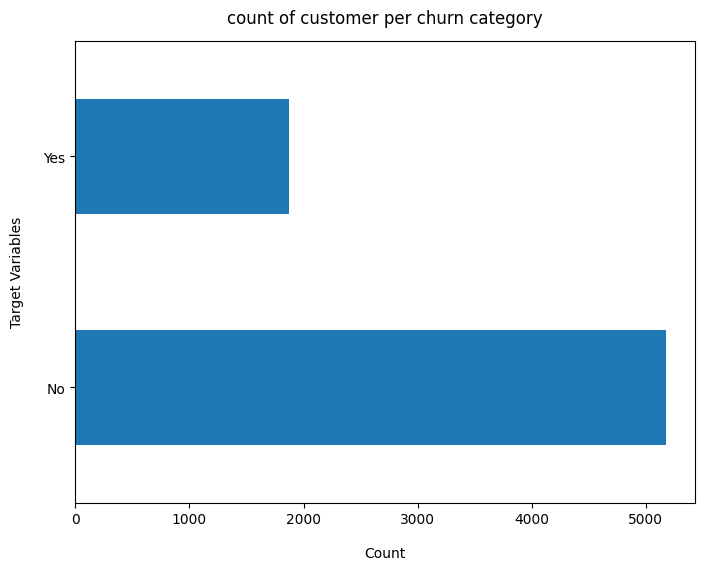

In [24]:
df['Churn'].value_counts().plot(kind = 'barh', figsize = (8,6))
plt.ylabel('Target Variables', labelpad = 14)
plt.xlabel('Count', labelpad = 14)
plt.title('count of customer per churn category', y=1.02)

* Data is highly imbalanced, ratio = 73:27
* So we analyse the data with other features while taking the target values separately to get some insights.

In [25]:
# Concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


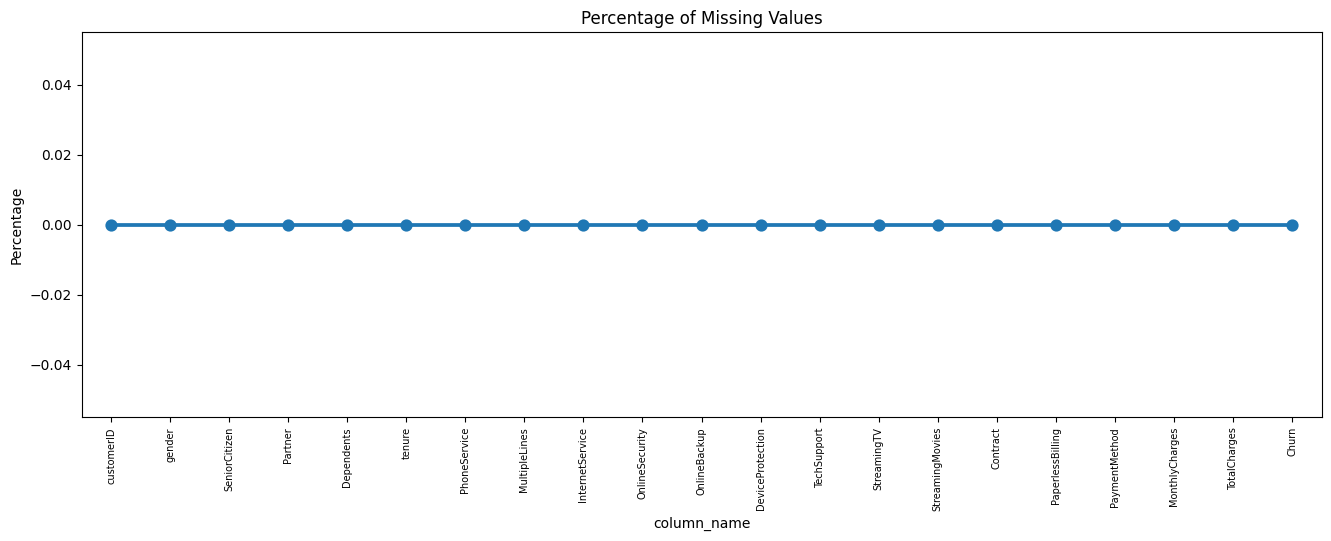

In [45]:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['column_name', 'missing_percent']

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='column_name', y='missing_percent', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

##### Missing Data - Initial Intuition
* Here, we don't have any missing data.
 
General Thumb Rule :

* For features with less missing values = can use regression to predict the missing values or fill with the mean of th values present, depending on the feature.
* For features with very high number of missing values - it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here. for example. Is_car & Car_Type, People having no cars, will obviously have Car_Type as NaN(null), but that doesn't make this column useless, so decision has to be taken wisely.

### Data Cleaning - 

1. Create a copy of base data for manupulation & processing 

In [52]:
new_df = df.copy()

2. Total charges should be numeric amount. Let's convert it to numerical data type

In [57]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors = 'coerce')
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [58]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


3. As we can see there 11 missing values in TotalCharges column. Let's check these records

In [59]:
new_df.loc[new_df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatment

Since the % of these compared to total dataset is very low ir 0.15%, it is safe to ignore them from further processing. 

In [62]:
# Removing missing values
new_df.dropna(how = 'any', inplace = True)
# telco_data.fillna(0)

5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 yrs, tenure group of 13-24: so on...

In [64]:
# Get the max tenure
print(new_df['tenure'].max())

72


In [65]:
labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]
print(labels)

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [67]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]

new_df['tenure_group'] = pd.cut(new_df.tenure, range(1,80,12), right = False, labels = labels)

In [68]:
new_df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

6. Remove columns not required for processing

In [70]:
# drop column customerID and tenure
new_df.drop(columns = ['customerID', 'tenure'], axis=1, inplace= True)

In [71]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Data Exploration - 

Plot distribution of individual predictors by churn

#### Univariate Analysis:

In [74]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [79]:
new_df.Churn.value_counts()/len(new_df)*100

Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

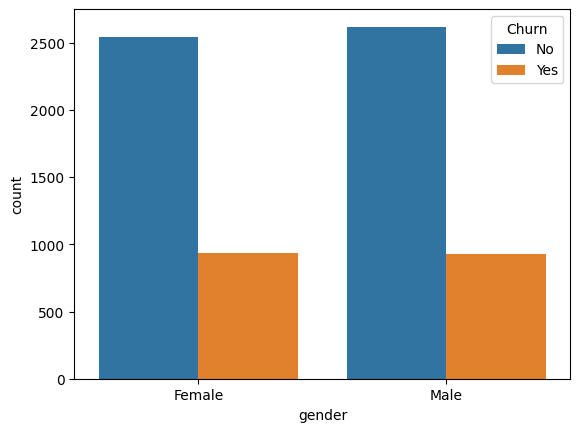

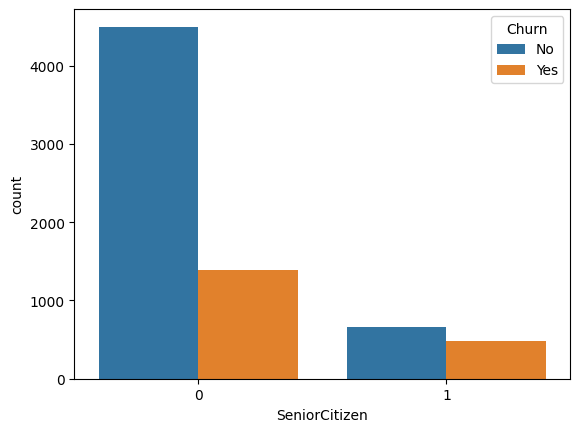

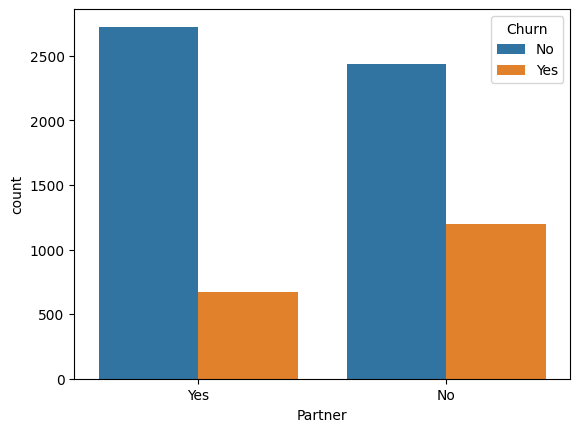

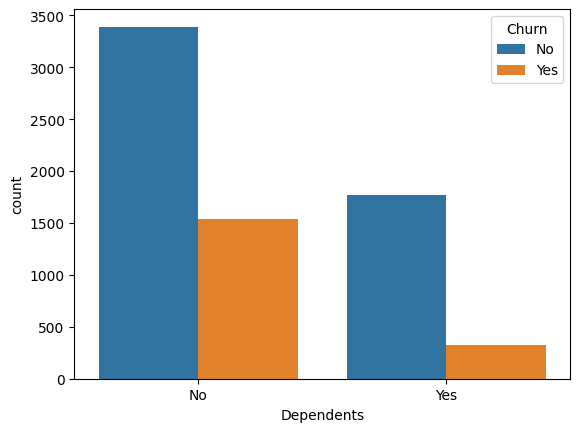

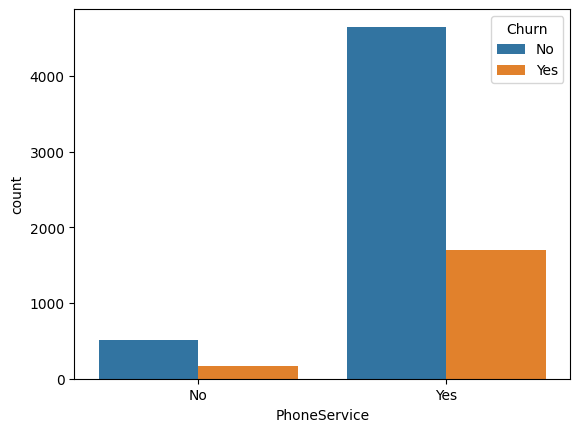

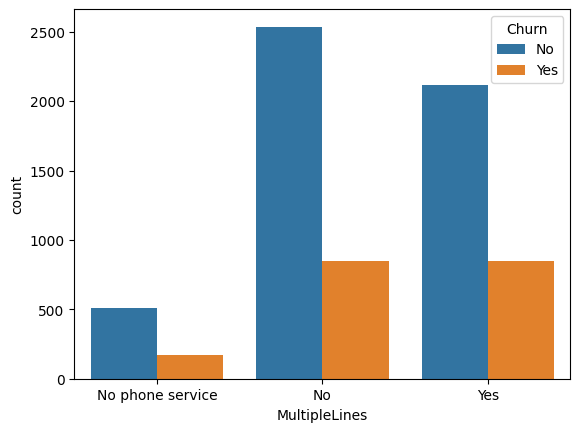

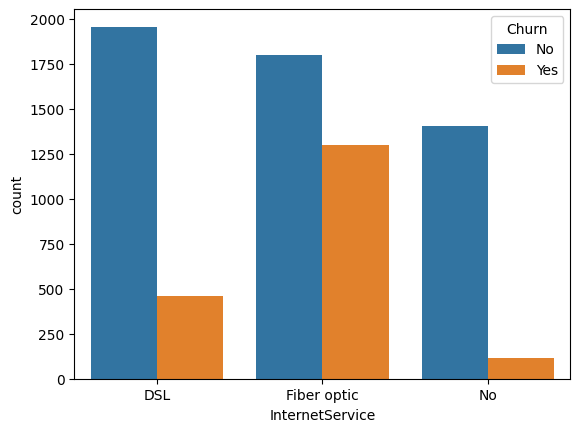

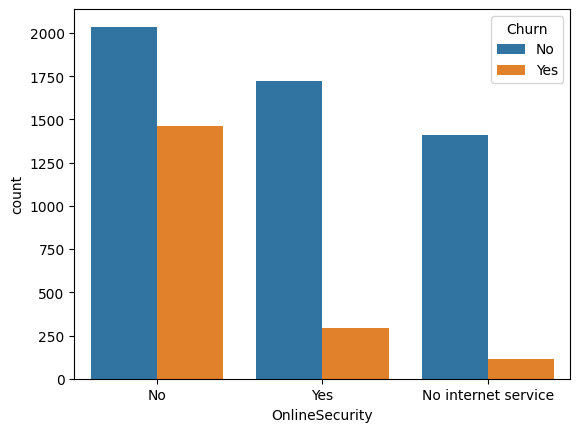

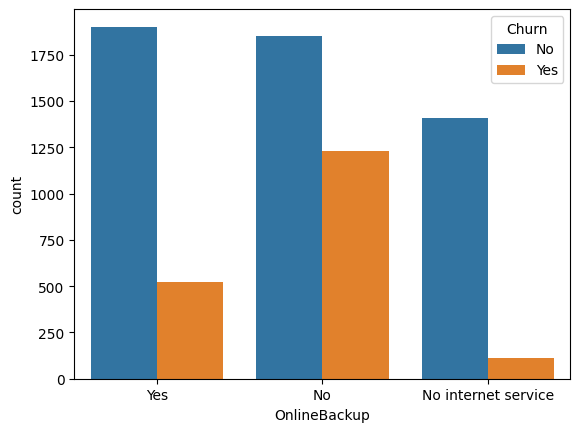

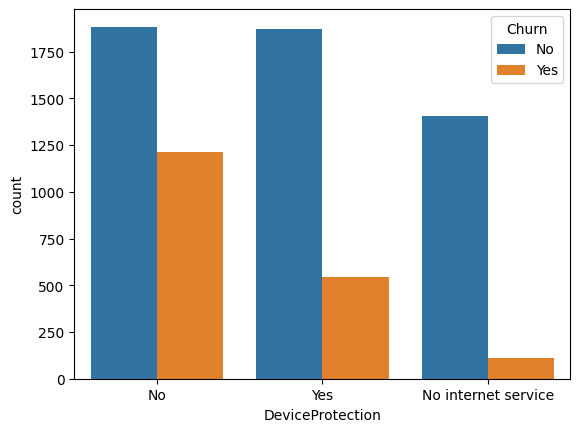

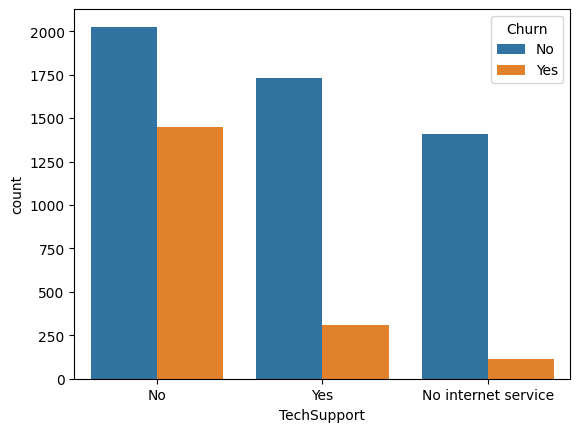

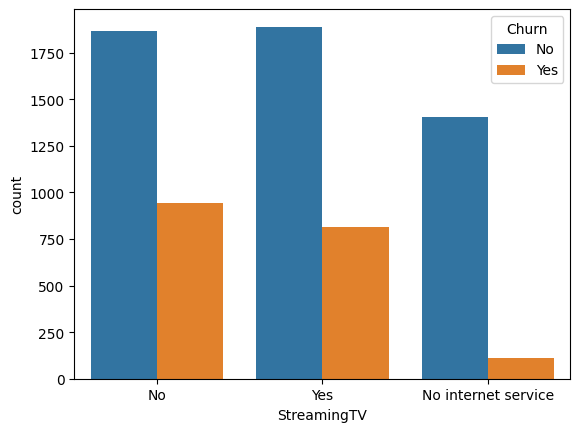

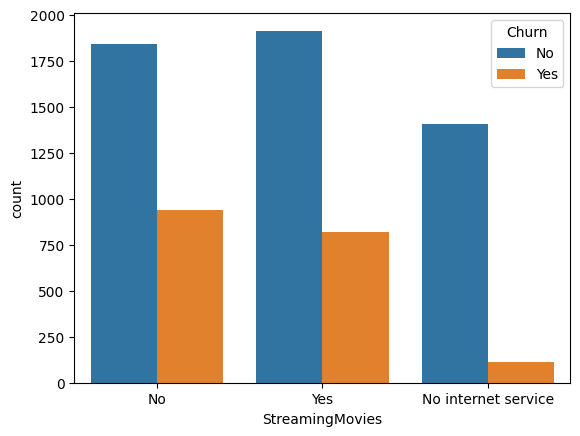

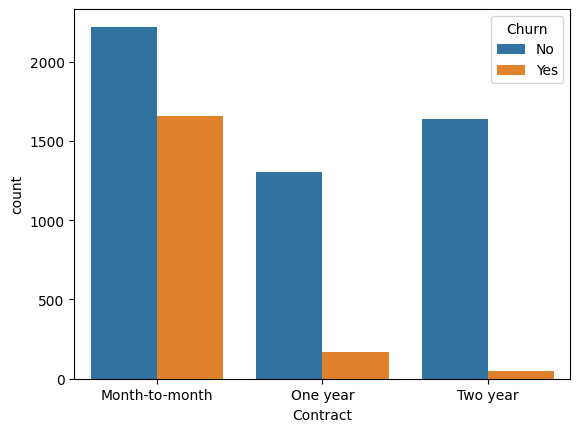

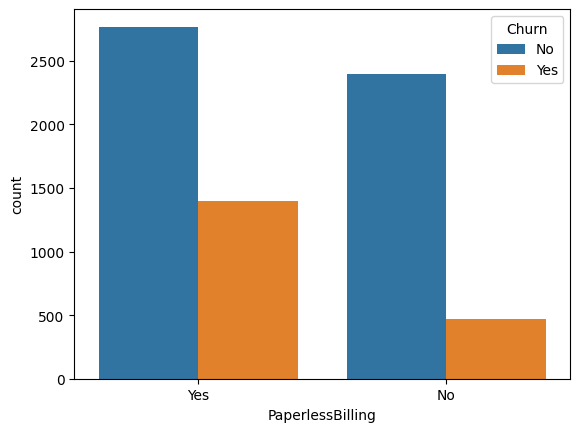

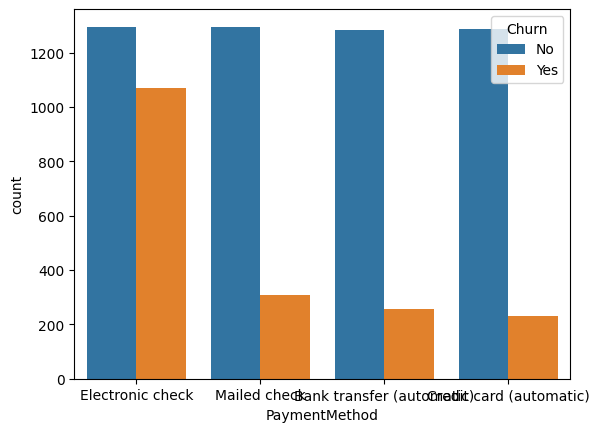

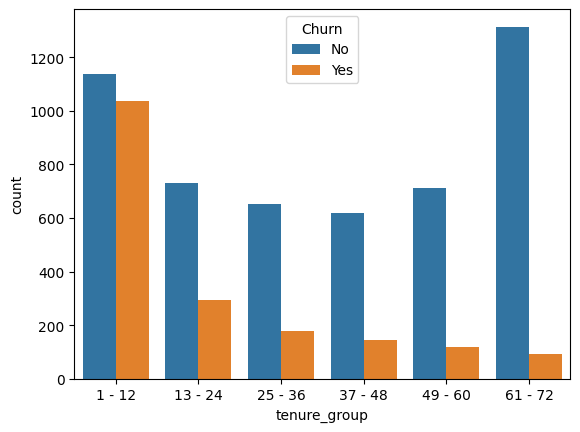

In [76]:
for i, predictor in enumerate(new_df.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges'])):
        plt.fig(i)
        sns.countplot(data=new_df, x = predictor, hue = 'Churn')

#### Numerical Analysis:

In [80]:
new_df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [82]:
new_df1_target0=new_df[new_df["Churn"] == 'No']
new_df1_target1=new_df[new_df["Churn"] == 'Yes']

In [83]:
new_df1_target1.gender.value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

In [85]:
new_df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [84]:
pd.crosstab(new_df.PaymentMethod, new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes = 1: No = 0

In [87]:
new_df['Churn'] = np.where(new_df.Churn == 'Yes',1,0)

In [88]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


3. Convert all the categorical variables into dummy variables

In [90]:
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


 Analyzing relationship between Monthly Charges and Total Charges

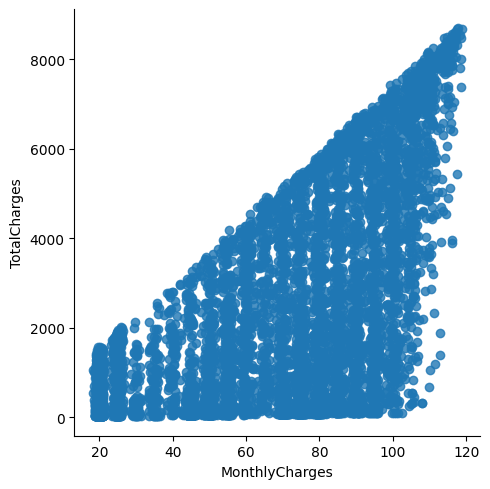

In [92]:
sns.lmplot(data=new_df_dummies, x='MonthlyCharges', y ='TotalCharges', fit_reg=False)

In [93]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

np.float64(0.6510648032262025)

Total Charges increase as Monthly Charges increase - as expected.
* Churn by MonthlyCharges & TotalCharges

C:\Users\MANISH\AppData\Local\Temp\ipykernel_11896\3984108315.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn'] == 0)],
C:\Users\MANISH\AppData\Local\Temp\ipykernel_11896\3984108315.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn'] == 1)],


Text(0.5, 1.0, 'Monthly Charges by Churn')

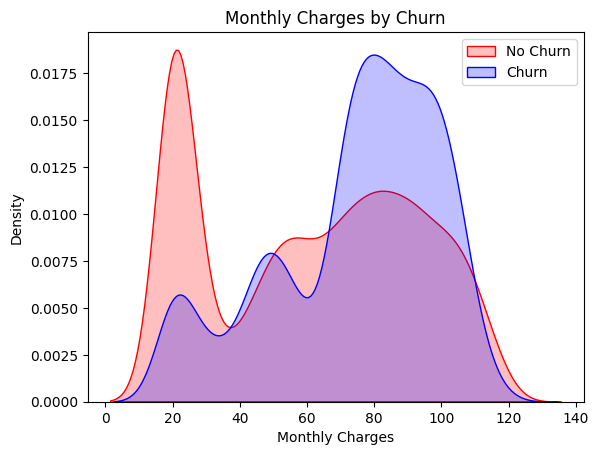

In [99]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn'] == 0)],
                  color = "Red", shade = True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn'] == 1)], 
                  ax = Mth, color = "Blue", shade = True)
Mth.legend(["No Churn", "Churn"], loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by Churn')
                 

* Insight : Churn is high when Monthly Charges are high.

C:\Users\MANISH\AppData\Local\Temp\ipykernel_11896\3547419997.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn'] == 0)],
C:\Users\MANISH\AppData\Local\Temp\ipykernel_11896\3547419997.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn'] == 1)],


Text(0.5, 1.0, 'Total Charges by Churn')

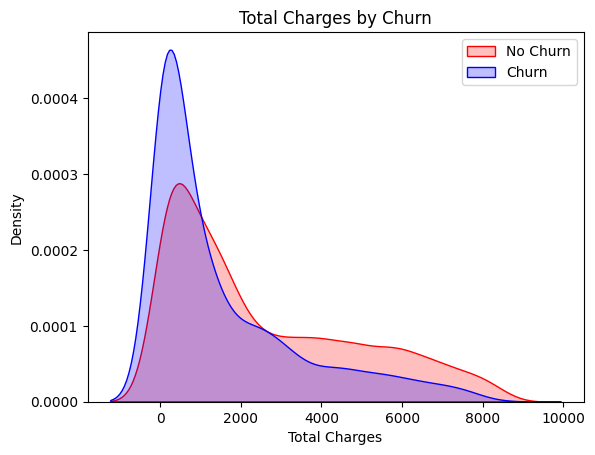

In [108]:
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn'] == 0)],
                  color = "Red", shade = True)
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn'] == 1)], 
                  ax = Tot, color = "Blue", shade = True)
Tot.legend(["No Churn", "Churn"], loc = 'upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total Charges by Churn')
                 

* Insight : As higher Churn at lower Total Charges
  
However if we combine the insights of 3 parameters i.e. Tnure, Monthly Charges & Total Charges then the picture is bit clear - Higher Monthly Charges at lower tenure results into lower Total Charges. Hence, all these 3 factors viz *Higher Monthly Charge.* *Lower tenure* and *Lower Total Charge* are linked to *High Churn.*

Build a correlation of all predictors with 'Churn'

<Axes: >

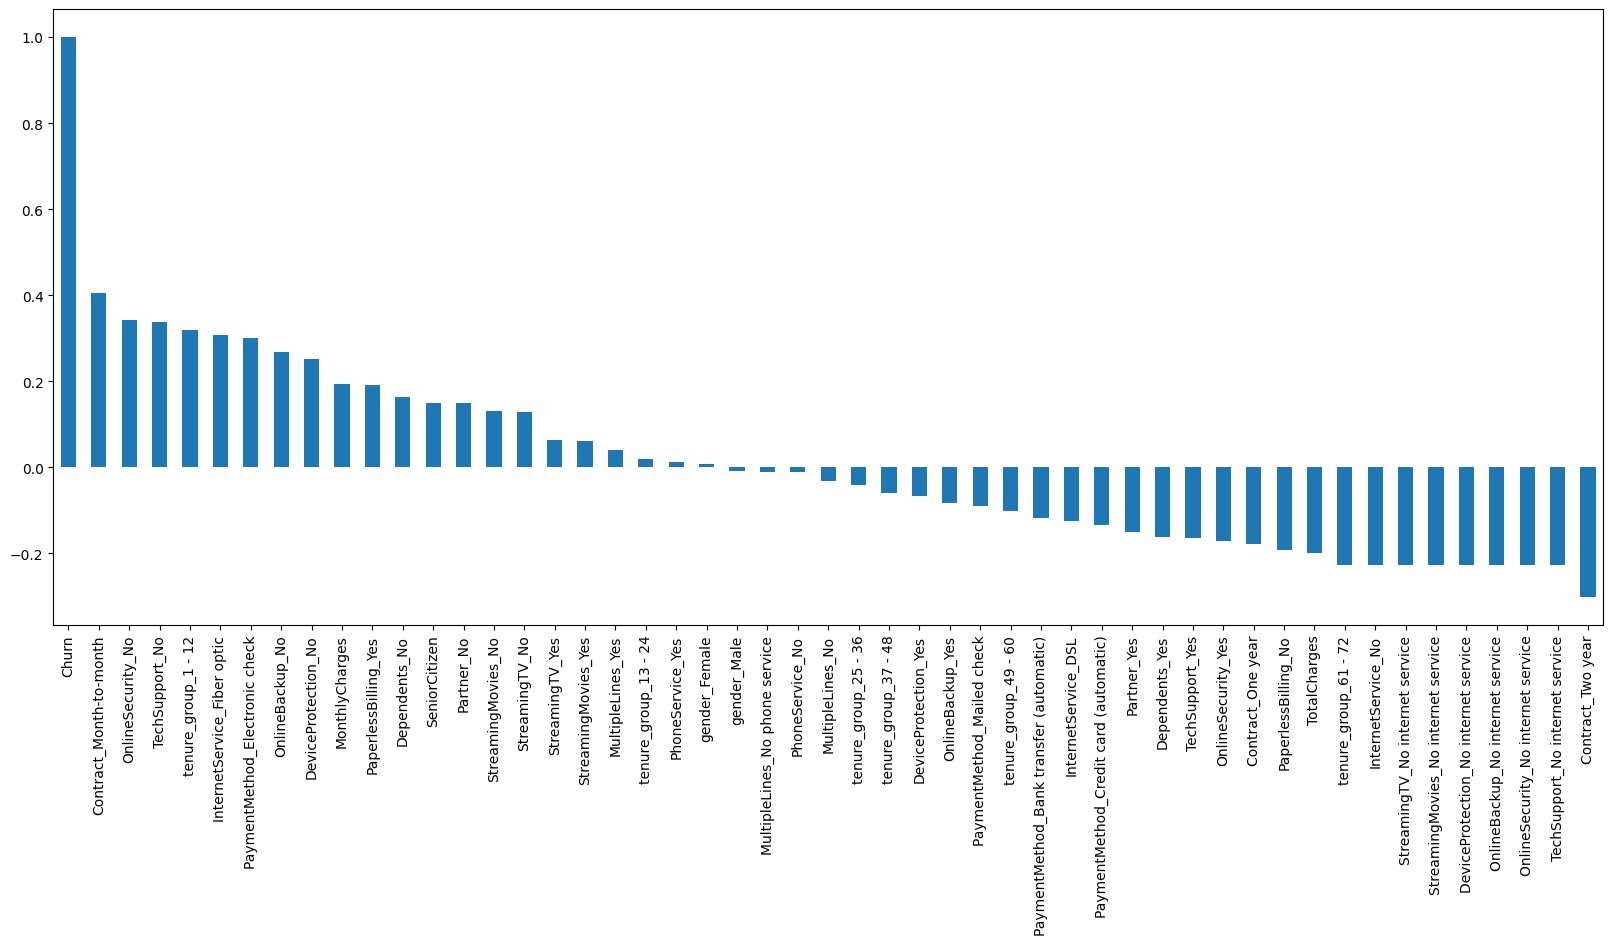

In [103]:
plt.figure(figsize = (20, 8))
new_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

* Derived Insights :

High Churn seen in case of Month to Month contracts, No online security. No Tech support. First year of subsciption and Fibre Optics internet

Low Churn is seen in case of Long term contracts. Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availablility of PhoneService and no. of multiple lines have almost NO impact on Churn.


C:\Users\MANISH\AppData\Local\Temp\ipykernel_11896\1936763778.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Ten = sns.kdeplot(df.tenure[(df['Churn'] == "No")],
C:\Users\MANISH\AppData\Local\Temp\ipykernel_11896\1936763778.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Ten = sns.kdeplot(df.tenure[(df['Churn'] == "Yes")],


Text(0.5, 1.0, 'Monthly Charges by Churn')

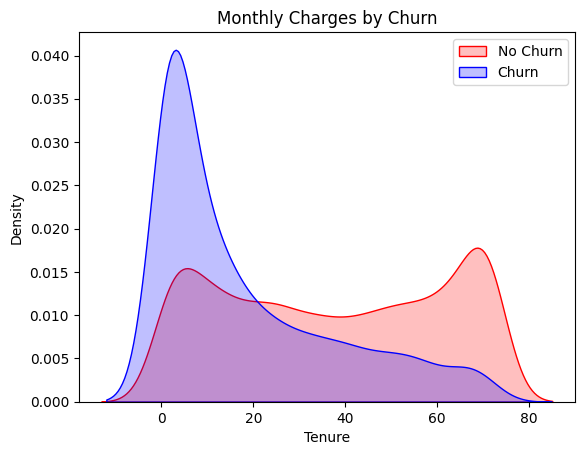

In [111]:
Ten = sns.kdeplot(df.tenure[(df['Churn'] == "No")],
                  color = "Red", shade = True)
Ten = sns.kdeplot(df.tenure[(df['Churn'] == "Yes")], 
                  ax = Ten, color = "Blue", shade = True)
Ten.legend(["No Churn", "Churn"], loc = 'upper right')
Ten.set_ylabel('Density')
Ten.set_xlabel('Tenure')
Ten.set_title('Monthly Charges by Churn')
                 

#### Bivariate Analysis - 

In [112]:
new_df1_target0 = new_df.loc[new_df['Churn'] == 0]
new_df1_target1 = new_df.loc[new_df['Churn'] == 1]

In [113]:
len(new_df1_target0)

5163

In [114]:
len(new_df1_target1)

1869

In [123]:
def uniplot(df,col,title,hue = None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 20
    plt.rcParams["axes.titlepad"] = 20

    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data =df, x =col, order = df[col].value_counts().index, hue = hue, palette='bright')

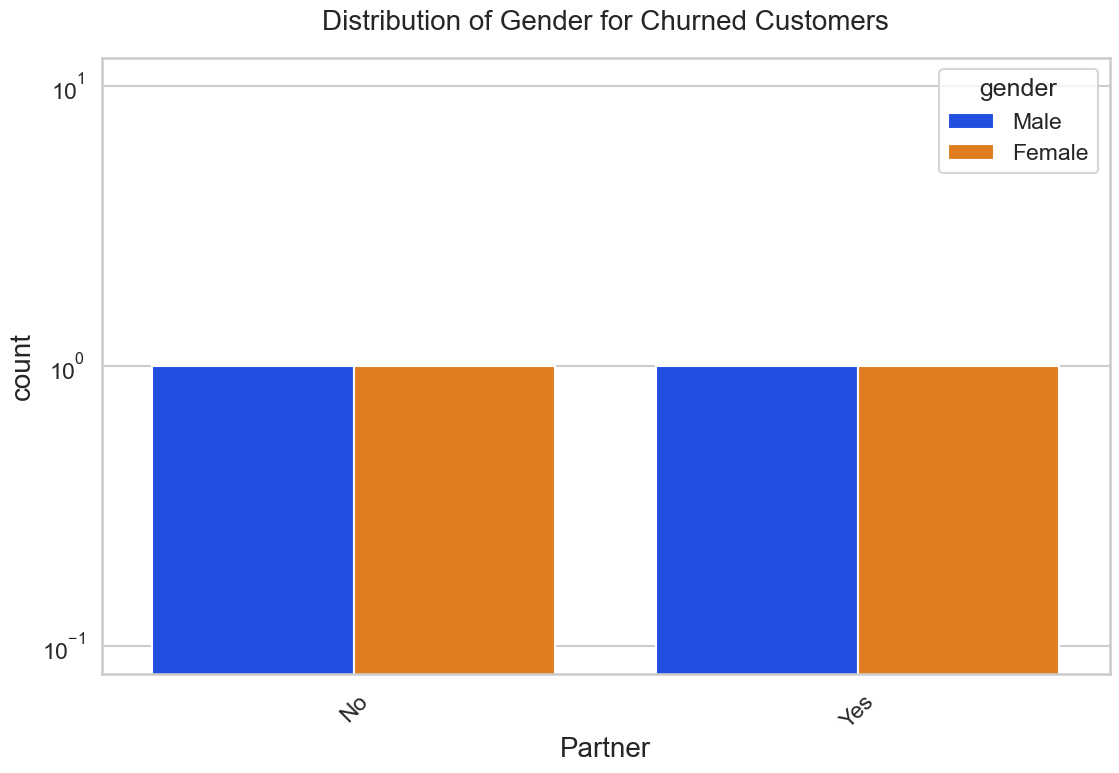

In [124]:
uniplot(new_df1_target1, col='Partner', title = 'Distribution of Gender for Churned Customers', hue = 'gender')

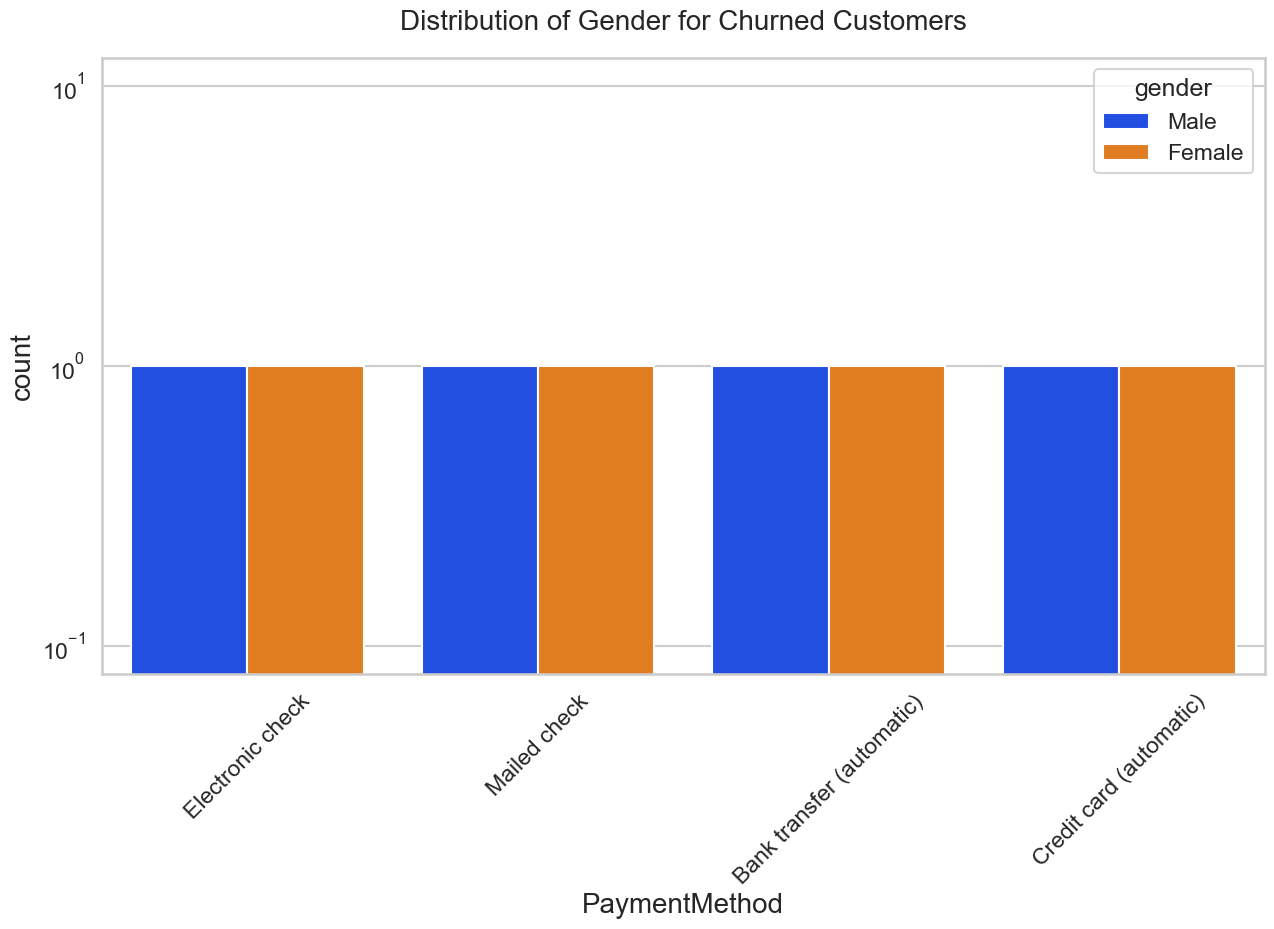

In [126]:
uniplot(new_df1_target1, col='PaymentMethod', title = 'Distribution of Gender for Churned Customers', hue = 'gender')

### Conclusion : 

There are some of the quick insights from the exercise - 

1. Electronic check medium are the highest churners.
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No online security, No tech support category are high churners.
4. Non senior citizen are high churners.

